In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Veri Yükleme

In [2]:
# tarih seçimi
start_date = "2019-01-02"
end_date = "2023-05-17"

# start_date = "2020-01-01"
# end_date = "2021-01-01"

In [3]:
# hisse seçimi
ticker = "YKBNK.IS AKBNK.IS KCHOL.IS SAHOL.IS THYAO.IS"

Borsa İstanbul(BİST)'da işlem gören büyük şirketlerden 5 tanesini analiz etmek istedim. Bu şirketler aşağıda listelenmiştir.

    1. AKBNK
    2. YKBNK
    3. KOCHL
    4. SAHOL
    5. THYAO

Aynı sektörden ikişer adet hisse seçip sektörel olarak hareketlerini gözlemlemek istedim. 
Son hisse olarak(THYAO) da uluslararası sahip olduğu büyüklüğü ve BİST100 üzerindeki ağırlığı sebebiyle diğer sektördeki hisselere yön verici olabilir mi diye gözlemlemek istedim.

In [4]:
# veri yükleme
data = yf.download(ticker, start_date, end_date)
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                             Close   
            AKBNK.IS   KCHOL.IS  SAHOL.IS THYAO.IS  YKBNK.IS  AKBNK.IS   
Date                                                                     
2019-01-02  4.803731  12.623137  5.826698    15.68  1.377284  5.607693  \
2019-01-03  4.745743  12.329782  5.745772    15.15  1.333699  5.540000   
2019-01-04  5.019866  12.107543  5.834791    15.09  1.377284  5.860000   
2019-01-07  5.088396  12.178660  5.899532    15.06  1.386001  5.940000   
2019-01-08  5.011299  12.569799  5.988552    15.09  1.377284  5.850000   

                                                ...      Open            
           KCHOL.IS SAHOL.IS THYAO.IS YKBNK.IS  ...  AKBNK.IS KCHOL.IS   
Date                                            ...                      
2019-01-02    14.20     7.20    15.68     1.58  ...  5.847777    14.13  \
2019-01-03    13.87     7.10    15.15     1.53  ...  5.630000    14.04   
2019-01-04    13.62     7.21    15.09     1.58  ...  5.590000    13.65   
2019-01-07    13.70     7.29    15.06     1.59  ...  5.950000    13.68   
2019-01-08    14.14     7.40    15.09     1.58  ...  5.990000    13.75   

                                           Volume                               
           SAHOL.IS   THYAO.IS YKBNK.IS  AKBNK.IS KCHOL.IS SAHOL.IS  THYAO.IS   
Date                                                                            
2019-01-02     7.49  16.129999     1.60  25445181  4244189  8143296  48650466  \
2019-01-03     7.15  15.610000     1.58  34213820  4153777  6284116  60474927   
2019-01-04     7.13  15.350000     1.54  58572781  3562041  5141666  51431175   
2019-01-07     7.27  15.250000     1.59  55190288  3670544  5254918  47463328   
2019-01-08     7.28  15.130000     1.58  74359629  3312745  7503062  32484031   

                      
            YKBNK.IS  
Date                  
2019-01-02  28800610  
2019-01-03  81555785  
2019-01-04  50521459  
2019-01-07  74117891  
2019-01-08  62402280  

[5 rows x 30 columns]

In [5]:
# veri hakkında genel bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1103 entries, 2019-01-02 to 2023-05-16
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AKBNK.IS)  1103 non-null   float64
 1   (Adj Close, KCHOL.IS)  1103 non-null   float64
 2   (Adj Close, SAHOL.IS)  1103 non-null   float64
 3   (Adj Close, THYAO.IS)  1103 non-null   float64
 4   (Adj Close, YKBNK.IS)  1103 non-null   float64
 5   (Close, AKBNK.IS)      1103 non-null   float64
 6   (Close, KCHOL.IS)      1103 non-null   float64
 7   (Close, SAHOL.IS)      1103 non-null   float64
 8   (Close, THYAO.IS)      1103 non-null   float64
 9   (Close, YKBNK.IS)      1103 non-null   float64
 10  (High, AKBNK.IS)       1103 non-null   float64
 11  (High, KCHOL.IS)       1103 non-null   float64
 12  (High, SAHOL.IS)       1103 non-null   float64
 13  (High, THYAO.IS)       1103 non-null   float64
 14  (High, YKBNK.IS)       1103 non-null  

In [6]:
# eksik veri kontrolü. Var ise toplamını görme

data.isnull().sum()

Adj Close  AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
Close      AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
High       AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
Low        AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
Open       AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
Volume     AKBNK.IS    0
           KCHOL.IS    0
           SAHOL.IS    0
           THYAO.IS    0
           YKBNK.IS    0
dtype: int64

In [7]:
# aynı değere sahip verinin olup olmadığına dair kontrol

data.duplicated().sum()

4

In [8]:
# aynı değere sahip verilerin kalıcı olarak kaldırılması

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

        Duplicated verileri temizleyerek datamızı temiz hale getirdik.

# İşlem Hacmi

In [9]:
# hisse adlarını kullanırken sürekli .IS yazmamak için değişiklik yaptım

AKBNK = data.rename(columns ={"AKBNK.IS":"AKBNK"}, inplace=True)
YKBNK = data.rename(columns ={"YKBNK.IS":"YKBNK"}, inplace=True)
THYAO = data.rename(columns ={"THYAO.IS":"THYAO"}, inplace=True)
KCHOL = data.rename(columns ={"KCHOL.IS":"KCHOL"}, inplace=True)
SAHOL = data.rename(columns ={"SAHOL.IS":"SAHOL"}, inplace=True)
data.head()

Adj Close                                           Close          
               AKBNK      KCHOL     SAHOL  THYAO     YKBNK     AKBNK  KCHOL   
Date                                                                          
2019-01-02  4.803731  12.623137  5.826698  15.68  1.377284  5.607693  14.20  \
2019-01-03  4.745743  12.329782  5.745772  15.15  1.333699  5.540000  13.87   
2019-01-04  5.019866  12.107543  5.834791  15.09  1.377284  5.860000  13.62   
2019-01-07  5.088396  12.178660  5.899532  15.06  1.386001  5.940000  13.70   
2019-01-08  5.011299  12.569799  5.988552  15.09  1.377284  5.850000  14.14   

                               ...      Open                                 
           SAHOL  THYAO YKBNK  ...     AKBNK  KCHOL SAHOL      THYAO YKBNK   
Date                           ...                                           
2019-01-02  7.20  15.68  1.58  ...  5.847777  14.13  7.49  16.129999  1.60  \
2019-01-03  7.10  15.15  1.53  ...  5.630000  14.04  7.15  15.610000  1.58   
2019-01-04  7.21  15.09  1.58  ...  5.590000  13.65  7.13  15.350000  1.54   
2019-01-07  7.29  15.06  1.59  ...  5.950000  13.68  7.27  15.250000  1.59   
2019-01-08  7.40  15.09  1.58  ...  5.990000  13.75  7.28  15.130000  1.58   

              Volume                                        
               AKBNK    KCHOL    SAHOL     THYAO     YKBNK  
Date                                                        
2019-01-02  25445181  4244189  8143296  48650466  28800610  
2019-01-03  34213820  4153777  6284116  60474927  81555785  
2019-01-04  58572781  3562041  5141666  51431175  50521459  
2019-01-07  55190288  3670544  5254918  47463328  74117891  
2019-01-08  74359629  3312745  7503062  32484031  62402280  

[5 rows x 30 columns]

    Veri setimizde sütun içinde sütun olduğu için sadece kullanacağımız sütunları seçme işlemleri yapmamız gerekiyor

In [10]:
# sadece hacim sütununu seçme

data_volume = data["Volume"]
data_volume.head()

,AKBNK,KCHOL,SAHOL,THYAO,YKBNK
Date,,,,,
2019-01-02,25445181,4244189,8143296,48650466,28800610
2019-01-03,34213820,4153777,6284116,60474927,81555785
2019-01-04,58572781,3562041,5141666,51431175,50521459
2019-01-07,55190288,3670544,5254918,47463328,74117891
2019-01-08,74359629,3312745,7503062,32484031,62402280


Text(0.5, 1.0, 'Hisselerin İşlem Hacmi')

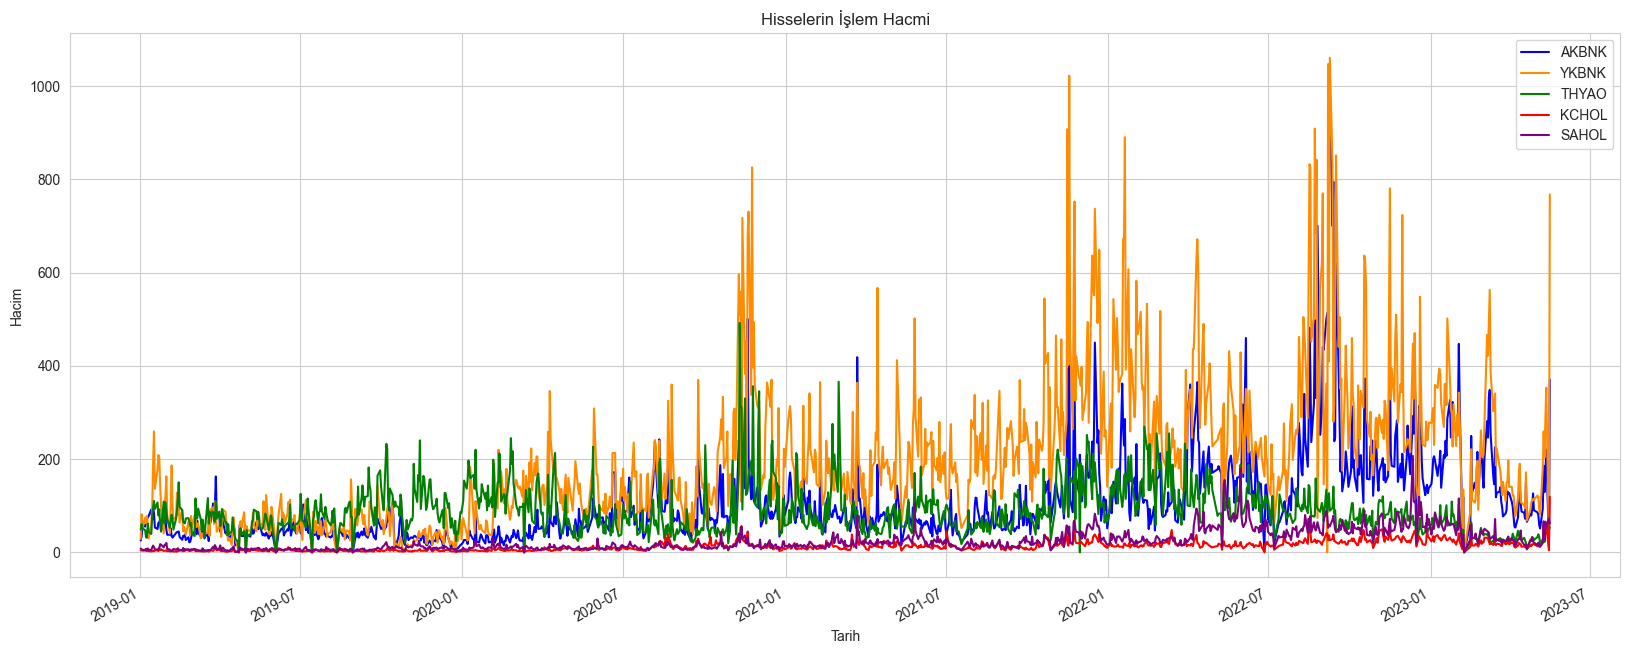

In [11]:
# seçilen her hisse için hacim kontrolü

# hacim verilerinin görselleştirilmesi

plt.figure(figsize=(20,8))
(data_volume["AKBNK"]/1000000).plot(color = "blue", label = "AKBNK")
(data_volume["YKBNK"]/1000000).plot(color = "darkorange", label = "YKBNK")
(data_volume["THYAO"]/1000000).plot(color = "green", label = "THYAO")
(data_volume["KCHOL"]/1000000).plot(color = "red", label = "KCHOL")
(data_volume["SAHOL"]/1000000).plot(color = "purple", label = "SAHOL")

plt.legend()
plt.xlabel("Tarih")
plt.ylabel("Hacim")
plt.title("Hisselerin İşlem Hacmi")

    Banka hisselerinde ulaşılan yüksek işlem hacimleri aynı tarihlerde gözlemlenmiş. Holding hisseleri de benzer hareketler göstermiş, bazı durumlarda SAHOL daha yüksek değerlere ulaşmış. Aynı sektörde bulunmayan THYAO ise yükselişe geçtiği dönemlerde diğer sektörleri de etkilediği görülmüş. Örnek olarak 2020 Kasım ve 2021 Ocak ayı aralığı, 2021 Kasım ayı ile 2022 Ocak ayı aralığı

In [12]:
# Daha net analiz gerçekleştirebilmek için 2021 Kasım ayı ve sonrasını incelemeye karar verdim

data = data["2021-10-01":]
data.head()

Adj Close                                       Close              
               AKBNK      KCHOL     SAHOL  THYAO     YKBNK AKBNK      KCHOL   
Date                                                                          
2021-10-01  4.655729  21.755293  8.947906  14.05  2.140963  5.30  22.760000  \
2021-10-04  4.638160  21.411182  8.856415  13.87  2.132005  5.28  22.400000   
2021-10-05  4.629375  21.564119  8.902160  14.04  2.123047  5.27  22.559999   
2021-10-06  4.585453  20.895020  8.774072  13.71  2.114089  5.22  21.860001   
2021-10-07  4.638160  21.296480  9.021099  14.12  2.140963  5.28  22.280001   

                               ...  Open                                 
           SAHOL  THYAO YKBNK  ... AKBNK      KCHOL SAHOL  THYAO YKBNK   
Date                           ...                                       
2021-10-01  9.78  14.05  2.39  ...  5.28  22.459999  9.72  13.92  2.39  \
2021-10-04  9.68  13.87  2.38  ...  5.32  22.719999  9.77  14.11  2.39   
2021-10-05  9.73  14.04  2.37  ...  5.29  22.400000  9.66  13.83  2.38   
2021-10-06  9.59  13.71  2.36  ...  5.26  22.379999  9.67  14.02  2.37   
2021-10-07  9.86  14.12  2.39  ...  5.28  22.120001  9.91  13.81  2.39   

              Volume                                          
               AKBNK    KCHOL     SAHOL     THYAO      YKBNK  
Date                                                          
2021-10-01  57970442  6845836  23788561  97542462  268085015  
2021-10-04  75918221  5442620  21953763  74809181  211864501  
2021-10-05  38405564  7243400  16298583  84235163  134268498  
2021-10-06  60571243  9882463  15437960  67415705  230951480  
2021-10-07  82618566  6428886  33497226  67668536  108638291  

[5 rows x 30 columns]

# Hisselerdeki Fiyat Dalgalanmaları

##### Hisselerin açılış, kapanış, en yüksek ve en düşük değerlerinin kontrolü

In [13]:
# Verimizde bulunan Close ve Open sütunlarının farkını st_diff olarak tanımladım. Böylelikle hisselerin gün sonundaki hareketlerinin pozitif ve negatif olarak görmek istedim.

st_diff = data["Close"] - data["Open"]
st_diff

,AKBNK,KCHOL,SAHOL,THYAO,YKBNK
Date,,,,,
2021-10-01,0.020000,0.300001,0.059999,0.130000,0.000000
2021-10-04,-0.040000,-0.320000,-0.090000,-0.240000,-0.010000
2021-10-05,-0.020000,0.160000,0.070000,0.210000,-0.010000
2021-10-06,-0.040000,-0.519999,-0.080000,-0.310000,-0.010000
2021-10-07,0.000000,0.160000,-0.050000,0.309999,0.000000
...,...,...,...,...,...
2023-05-10,0.109999,1.299995,0.279999,-2.500000,0.099999
2023-05-11,1.680000,8.299995,3.739998,10.000000,0.990000
2023-05-12,0.060001,-2.099998,-1.240002,-4.099991,-0.270000


Text(0.5, 1.0, 'Hisselerin Açılış ve Kapanış Değerleri Arasındaki Fark')

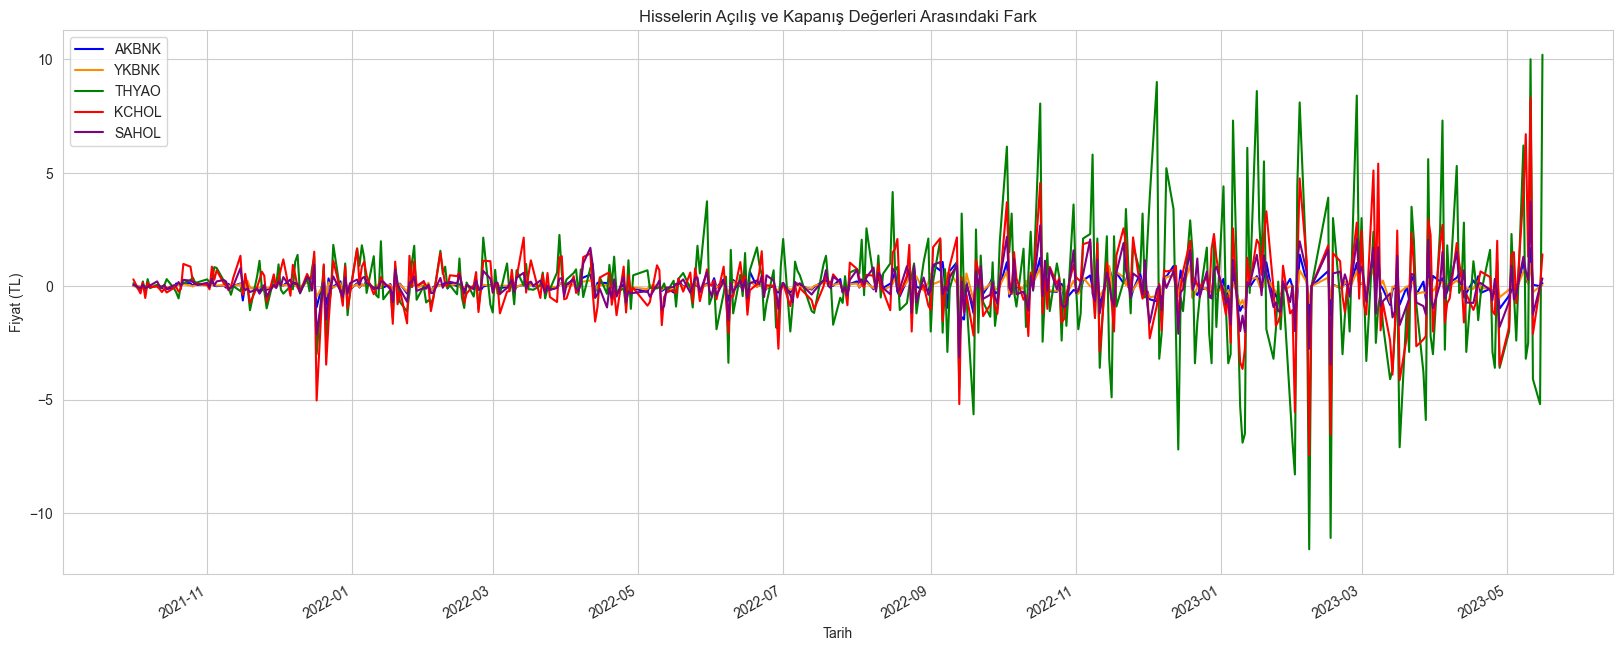

In [14]:
# Açılış ve kapanış değerleri arasındaki farkın görselleştirilmesi

plt.figure(figsize=(20,8))
(st_diff["AKBNK"]).plot(color = "blue", label = "AKBNK")
(st_diff["YKBNK"]).plot(color = "darkorange", label = "YKBNK")
(st_diff["THYAO"]).plot(color = "green", label = "THYAO")
(st_diff["KCHOL"]).plot(color = "red", label = "KCHOL")
(st_diff["SAHOL"]).plot(color = "purple", label = "SAHOL")

plt.legend()
plt.ylabel("Fiyat (TL)")
plt.xlabel("Tarih")
plt.title("Hisselerin Açılış ve Kapanış Değerleri Arasındaki Fark")

    Gün sonu değerlendirmeler yapmak istediğimizde bu grafiğe bakabiliriz. THYAO'nun her günün sonunda çok sert hareketler yaptığını görüyoruz. Holdingler benzer hareketler yapıyor olsa da KCHOL'nin SAHOL'ye göre daha sert hareketler yapıyor diyebiliriz. Bankaların ise daha dengeli hareket ettiği gözlemleniyor

In [15]:
# Gün sonunda oluşan açılış ve kapanış değerleri arasındaki farkın ortalamasını merak ettim

avg_diff = {
    "AKBNK" : [st_diff["AKBNK"].mean()],
    "YKBNK" : [st_diff["YKBNK"].mean()],
    "THYAO" : [st_diff["THYAO"].mean()],
    "KCHOL" : [st_diff["KCHOL"].mean()],
    "SAHOL" : [st_diff["SAHOL"].mean()]
}
pd.DataFrame(avg_diff, index=["avg_diff"])

,AKBNK,YKBNK,THYAO,KCHOL,SAHOL
avg_diff,-0.008701,0.001569,0.037157,0.040613,0.001005


    Orta - uzun vadeli bir süreç sonunda ortalama nasıl hareket oluyor diye görebilmek ve gün sonu değerlendirmeleri daha iyi analizleyebilmek için ortalamayı görmek istedim. Ortalamaları görünce yukarıdaki grafikte yaptığım yorumun tutarlılığını görmüş oluyorum.

In [22]:
# Verimizde bulunan High ve Low sütunlarının farkını spread olarak tanımladım. Böylelikle hisselerin gün içindeki hareketlerinin pozitif ve negatif olarak görmek istedim.

spread = data["High"] - data["Low"]
spread.head()

,AKBNK,KCHOL,SAHOL,THYAO,YKBNK
Date,,,,,
2021-10-01,0.08,0.540001,0.18,0.280000,0.04
2021-10-04,0.06,0.459999,0.22,0.310000,0.04
2021-10-05,0.05,0.320000,0.20,0.290000,0.04
2021-10-06,0.08,0.599998,0.21,0.450001,0.04
2021-10-07,0.05,0.300001,0.23,0.320000,0.03


Text(0, 0.5, 'Fiyat (TL)')

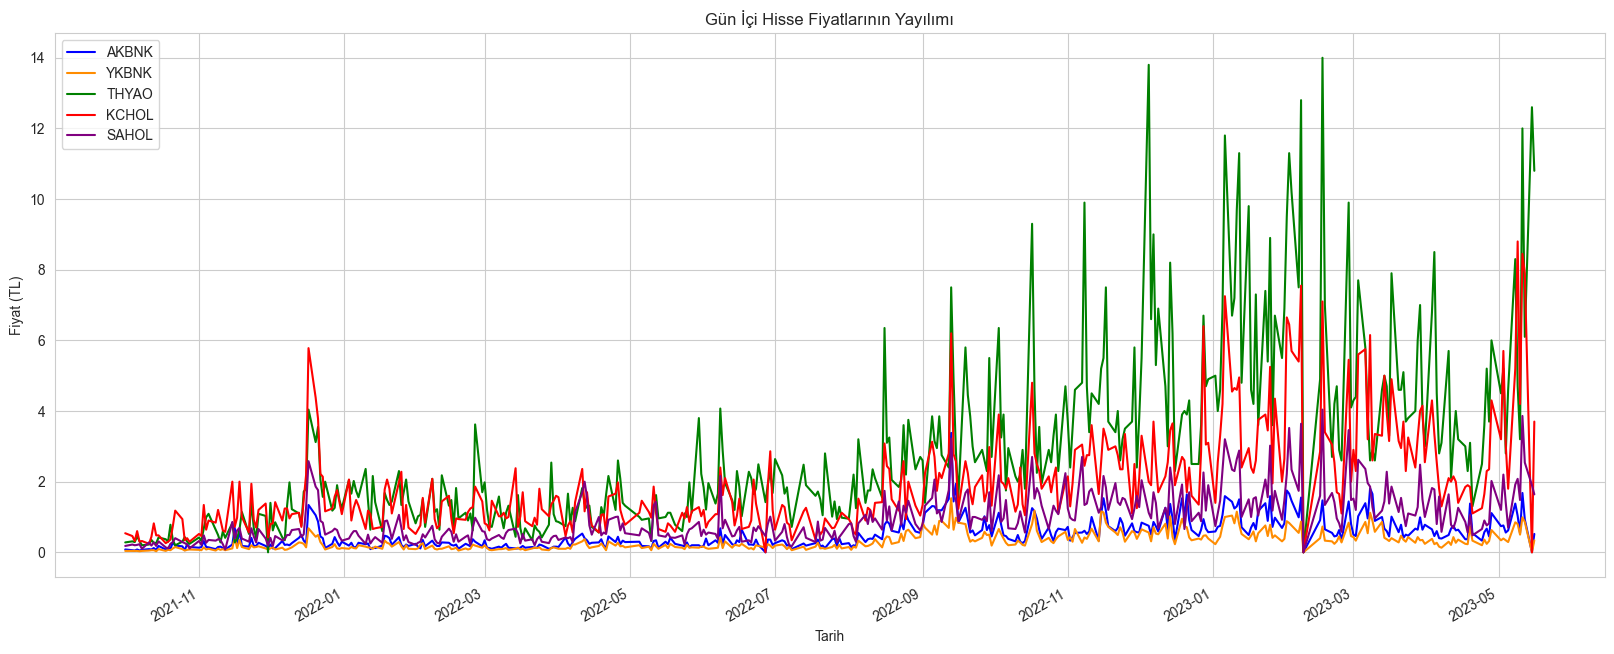

In [24]:
# En yüksek ve en düşük değerlerin görselleştirilmesi

plt.figure(figsize=(20,8))
spread["AKBNK"].plot(color = "blue", label = "AKBNK")
spread["YKBNK"].plot(color = "darkorange", label = "YKBNK")
spread["THYAO"].plot(color = "green", label = "THYAO")
spread["KCHOL"].plot(color = "red", label = "KCHOL")
spread["SAHOL"].plot(color = "purple", label = "SAHOL")

plt.legend()
plt.title("Gün İçi Hisse Fiyatlarının Yayılımı")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (TL)")

    Bu grafikte gün içindeki hareket aralığı hakkında fikirler elde edebiliyoruz. THYAO'nun çok sert iniş çıkışlar yapabildiğini, holdinglerin benzer hareketler yaptığını ancak KCHOL'nin SAHOL'ye göre daha sert hareketler yaptığı görülüyor. Bankalar ise daha sakin hareket yapıyor diyebiliriz.

In [25]:
# Gün içinde oluşan en yüksek ve en düşük değerler arasındaki farkın ortalamasını merak ettim
avg_spread = {
    "AKBNK" : [spread["AKBNK"].mean()],
    "YKBNK" : [spread["YKBNK"].mean()],
    "THYAO" : [spread["THYAO"].mean()],
    "KCHOL" : [spread["KCHOL"].mean()],
    "SAHOL" : [spread["SAHOL"].mean()]
}

pd.DataFrame(avg_spread, index = ["avg_spread"])

,AKBNK,YKBNK,THYAO,KCHOL,SAHOL
avg_spread,0.514559,0.315294,2.899804,1.942133,0.968554


In [26]:
avg_diff

{'AKBNK': [-0.008700949304244098],
 'YKBNK': [0.001568608424242805],
 'THYAO': [0.03715673147463331],
 'KCHOL': [0.04061270227619246],
 'SAHOL': [0.0010049039242314357]}

    avg_diff ile avg_spread arasında analiz yapmak istediğimde, ortalama açılış ve kapanış değerlerinde THYAO ve KCHOL diğer hisselere göre net hareketler yapmış. Bunu gün içi tavan ve taban fiyatların ortalaması ile kıyasladığımda bu ortalamaların birbirleri ile örtüştüğünü görebiliyoruz.

# Hareketli Ortalamalar ve Fiyat Trendi

    Hareketli ortalama trend takipçisi olarak kullanılan önemli bir göstergedir ve teknik analizde sıkça kullanılmaktadır. Hareketli ortalamalar fiyatların nereye gideceği hakkında bir yol göstermekten ziyade, gecikmeli olarak mevcut yönü göstermektedir. Geçmiş fiyatlara dayalı bir gösterge olduğu için gecikmelidir.

In [27]:
# veri setimizde sadece close sütununu kullanacağımız için bu sütunu data_close'a eşitledik

data_close = data["Close"]

# 5 günlük hareketli ortalamanın hesaplanması

AKBNK = data_close["AKBNK"]
akbnk_ma = AKBNK.rolling(window=5).mean()

YKBNK = data_close["YKBNK"]
YKBNK_ma = YKBNK.rolling(window=5).mean()

THYAO = data_close["THYAO"]
thyao_ma = THYAO.rolling(window=5).mean()

KCHOL = data_close["KCHOL"]
kchol_ma = KCHOL.rolling(window=5).mean()

SAHOL = data_close["SAHOL"]
sahol_ma = SAHOL.rolling(window=5).mean()

# hisselerin kapanış değerleri ile hareketli ortalamalarının değerlerini görmek ve daha sonra kullanabilmek için close ve close_ma adıyla oluşturdum

close = pd.concat([AKBNK, YKBNK, THYAO, KCHOL, SAHOL], axis = 1)
close_ma = pd.concat([akbnk_ma, YKBNK_ma, thyao_ma, kchol_ma, sahol_ma], axis = 1)
close_ma.tail()

,AKBNK,YKBNK,THYAO,KCHOL,SAHOL
Date,,,,,
2023-05-10,16.158,9.866,128.320001,81.489998,38.720000
2023-05-11,16.748,10.304,130.040002,85.519998,39.843999
2023-05-12,17.558,10.790,131.460004,89.749998,40.807999
2023-05-15,17.734,10.902,129.780003,91.069998,40.587999
2023-05-16,17.546,10.720,131.200002,89.679999,40.307999


Text(0, 0.5, 'Fiyat (TL)')

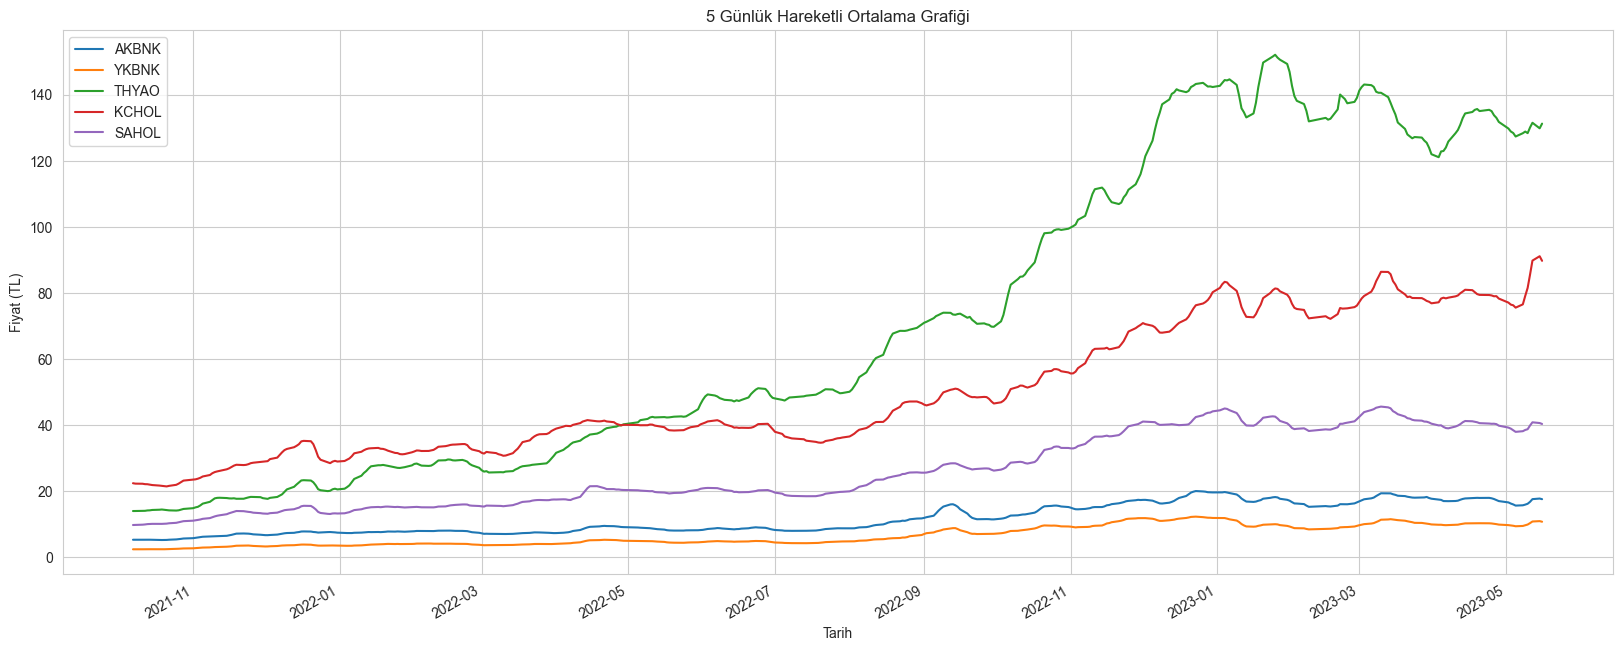

In [29]:
# hareketli ortalamanın görselleştirilmesi

close_ma.plot(figsize=(20,8))

plt.title("5 Günlük Hareketli Ortalama Grafiği")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (TL)")

    5 günlük hareketli ortalamalara genel olarak bakarsak yükseliş ve düşüşler aynı anda gerçekleşmiş. Sadece sektörel olarak değil bütün hisselerde aynı anda gözüküyor.

# Hisselerin Fiyatları

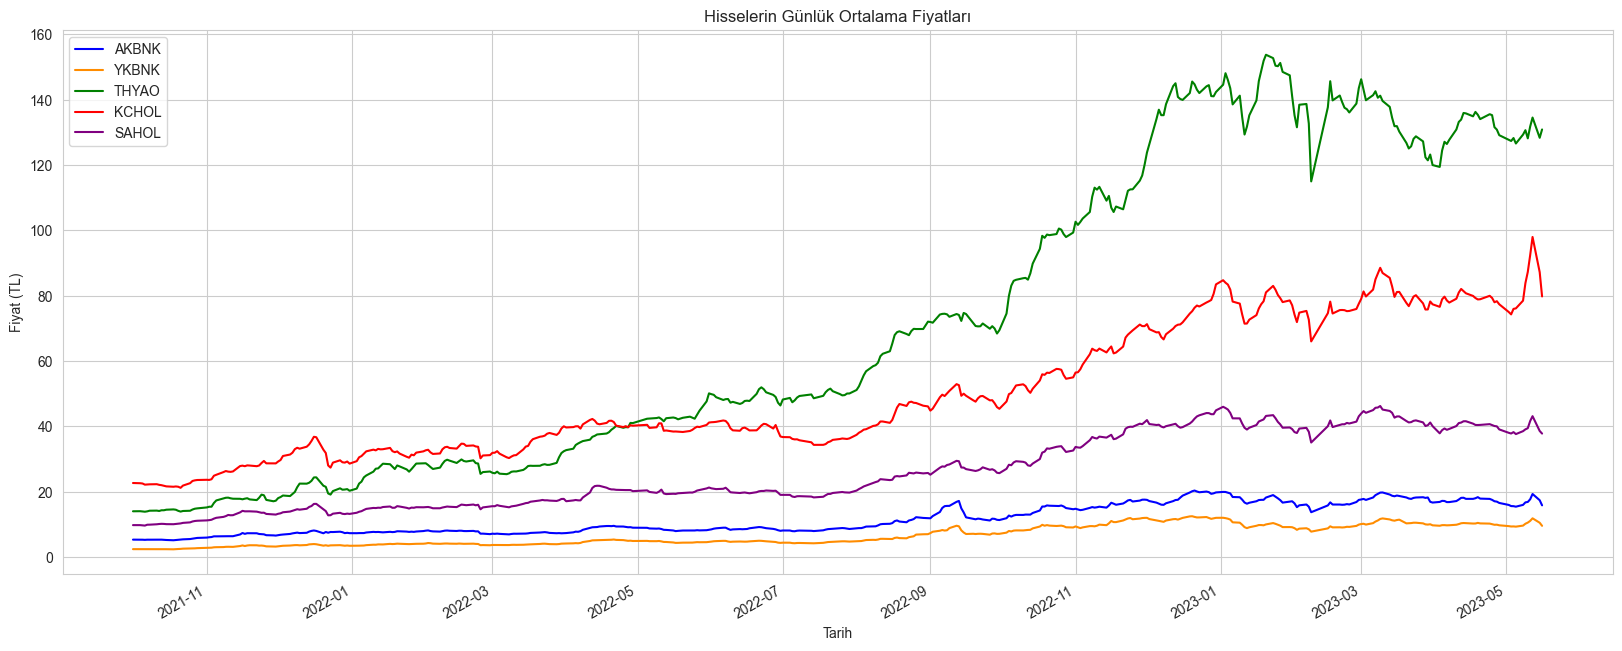

In [30]:
# Hisselerin günlük ortalama fiyatlarını bulma

daily_avg = (data["Open"] + data["Close"] + data["High"] + data["Low"]) / 4

plt.figure(figsize=(20,8))
daily_avg["AKBNK"].plot(color = "blue", label ="AKBNK")
daily_avg["YKBNK"].plot(color = "darkorange", label = "YKBNK")
daily_avg["THYAO"].plot(color = "green", label = "THYAO")
daily_avg["KCHOL"].plot(color = "red", label = "KCHOL")
daily_avg["SAHOL"].plot(color = "purple", label = "SAHOL")

plt.title("Hisselerin Günlük Ortalama Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (TL)")
plt.legend()

    Hareketli ortalama ile hisselerin günlük fiyat ortalamalarını kıyasladığımızda hareketlerin birebir olması normal. Buradaki en önemli fark hareketli ortalamada keskinlik azalırken hisselerin günlük fiyatlarında keskinlik çok net oluyor. Bu sebeple hareketli ortalamaya bakarak daha sakin ve rahat hareket edilebilir

# Hisselerin Günlük Açılış, Kapanış, En Yüksek ve En Düşük Fiyatlarını Görselleştirme

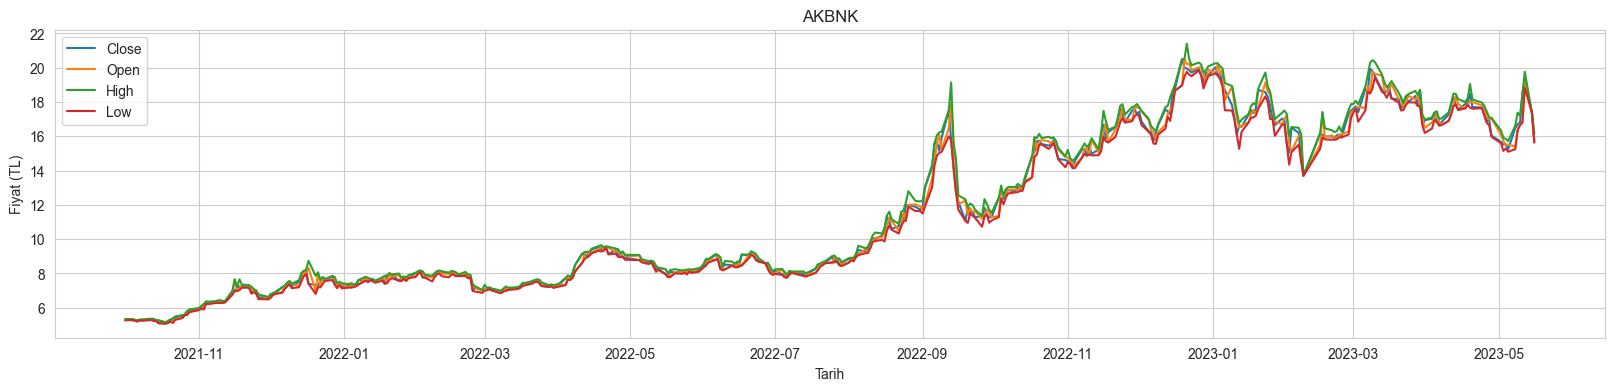

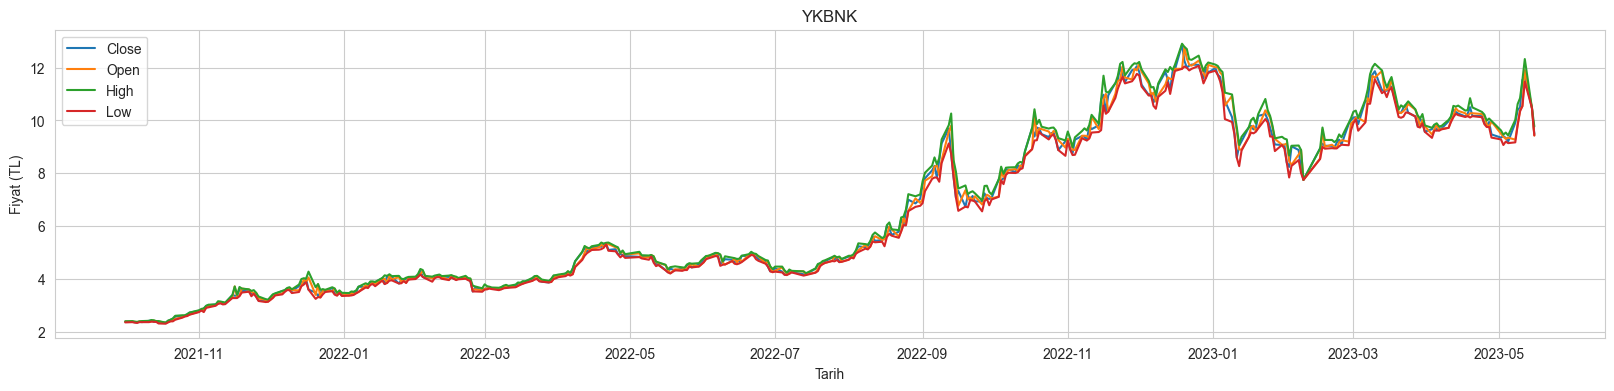

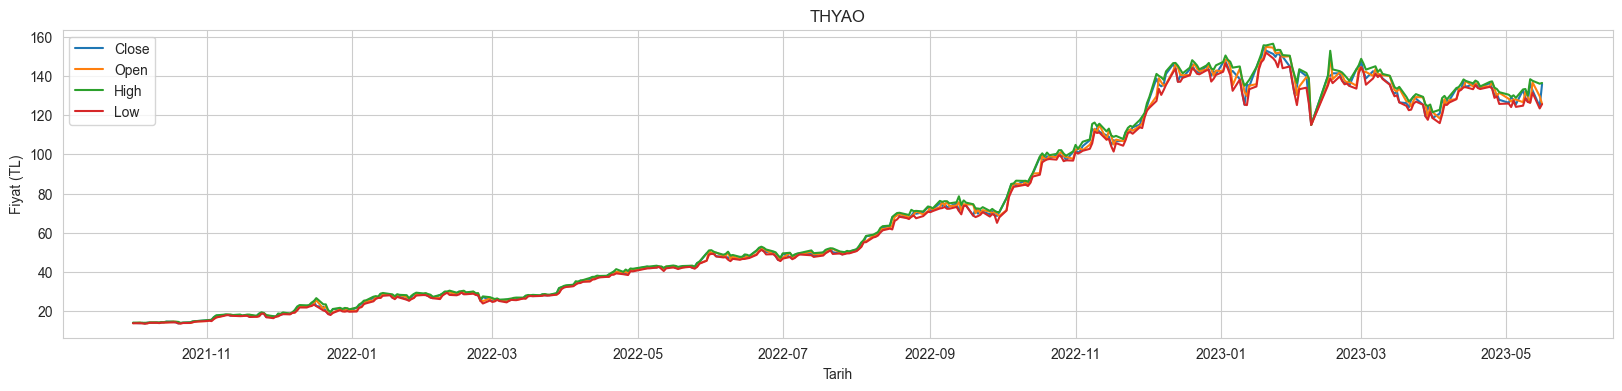

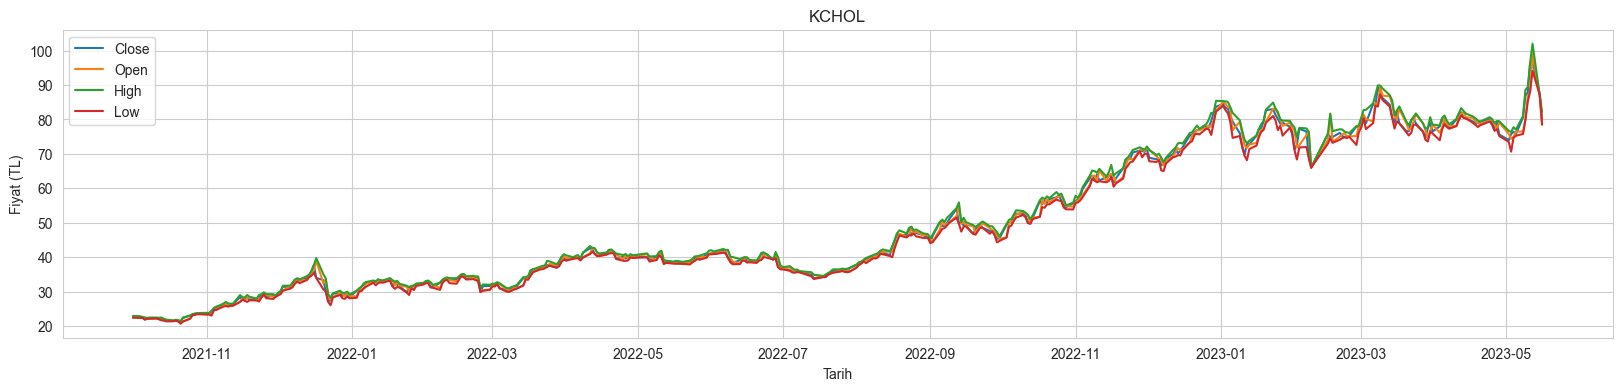

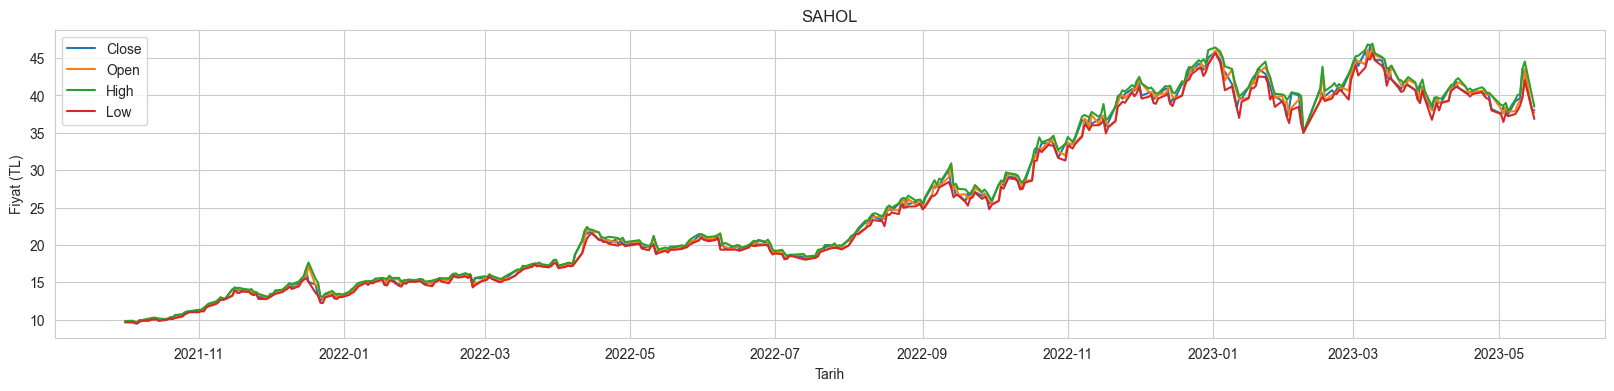

In [31]:
stocks = ["AKBNK", "YKBNK", "THYAO", "KCHOL", "SAHOL"]

for stock in stocks:
    fig, ax = plt.subplots(figsize=(20,4))
    ax.plot(data['Close'][stock], label='Close')
    ax.plot(data['Open'][stock], label='Open')
    ax.plot(data['High'][stock], label='High')
    ax.plot(data['Low'][stock], label='Low')
    ax.set(title=stock, xlabel='Tarih', ylabel='Fiyat (TL)')
    ax.legend()

    Aynı sektördeki farklı hisseler birbirinin kopyası grafikleri oluşturmuşlar desek pek yanılmış sayılmayız...

## Hisseler Arasındaki İlişkiyi Korelasyon Üzerinde Görme

Text(0.5, 1.0, 'Hisseler Arasındaki Korelasyon İlişkisi')

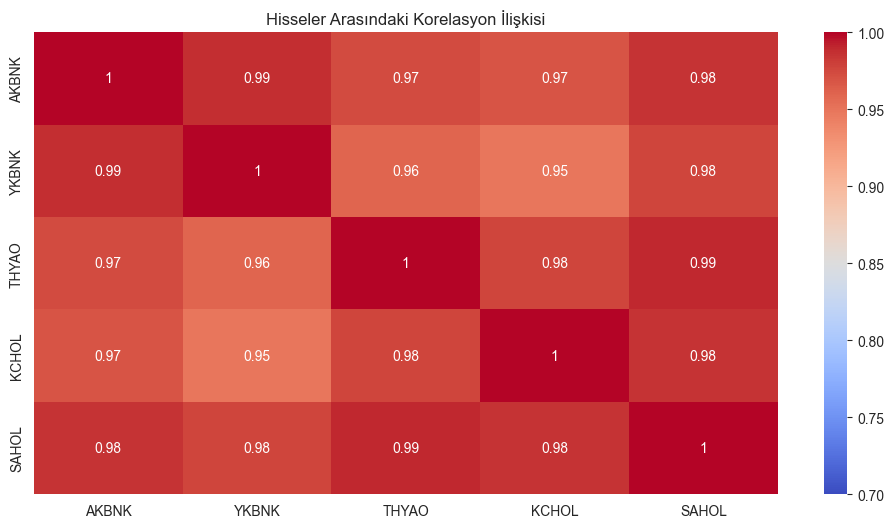

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(), vmin=0.7, vmax=1, cmap="coolwarm", annot=True)
plt.title("Hisseler Arasındaki Korelasyon İlişkisi")

# Getiri Oranı

Text(0, 0.5, 'Getiri Oranı')

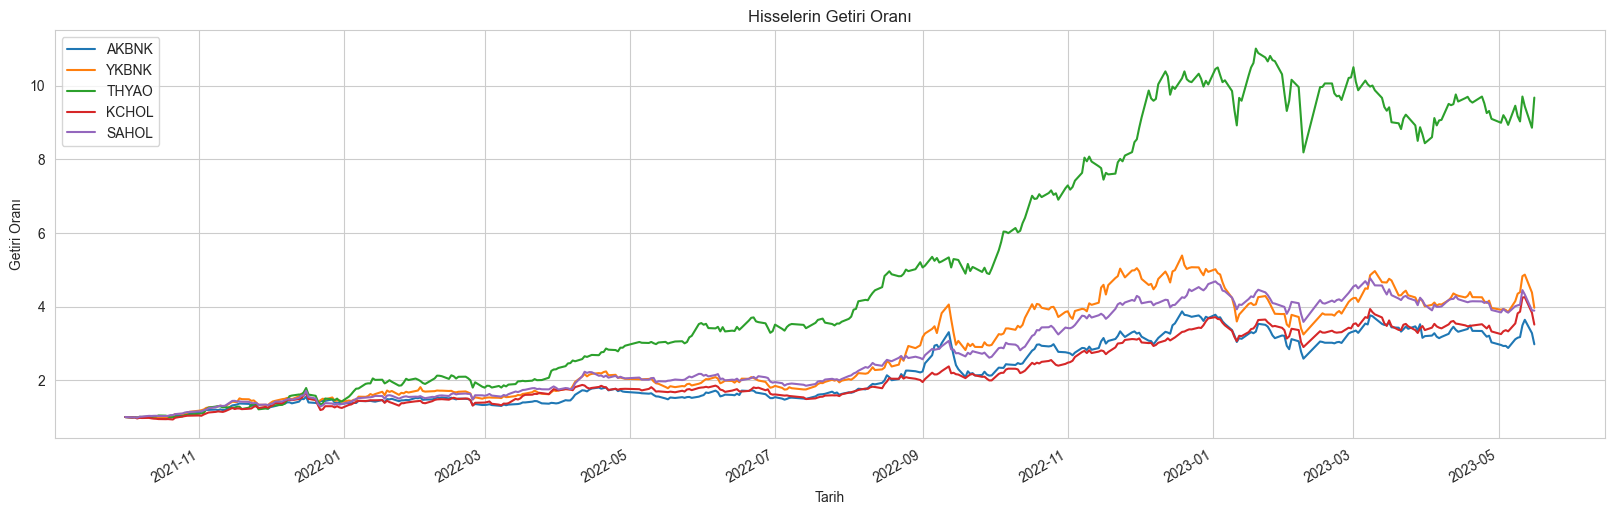

In [33]:
# getiri oranı = hissenin mevcut fiyatı / hissenin başlangıç fiyatı

returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(20,6))
plt.title("Hisselerin Getiri Oranı")
plt.xlabel("Tarih")
plt.ylabel("Getiri Oranı")

    2021 yılının sonundan günümüze baktığımızda en yüksek getiri oranı THYAO'da gözüküyor. KCHOL diğer grafiklerde hep ön planda olmasına rağmen uzun vadede diğer hisselere göre çok başarılı olamamış. KCHOL'de oluşan volatilite yatırımcıların çok işine yaramamış gibi duruyor